




























































































































































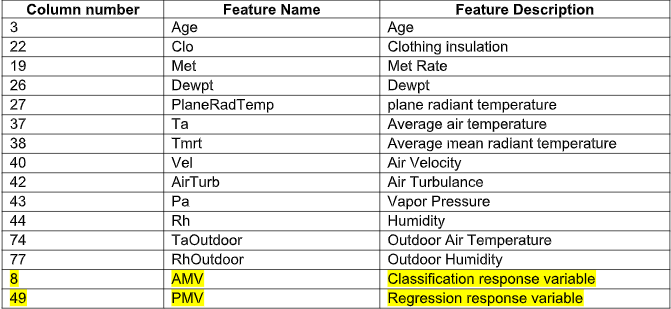

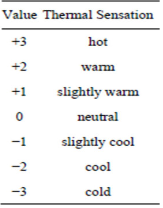

In [ ]:
#updating libararies because it gives error on mlx

!pip install mlxtend
!pip install scikit-learn --upgrade
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 12.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import math
from numpy import mean
from numpy import absolute

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn import preprocessing


#Part A



In [ ]:
#data set 80 cols 12565 rows
dataframe=pd.read_csv('finaldata.csv')
dataframe.shape

(12565, 80)

In [ ]:
#creating a new dataframe for my easiness

c1 = dataframe.iloc[:,2]
c2 = dataframe.iloc[:,21]
c3 = dataframe.iloc[:,18]
c4 = dataframe.iloc[:,25]
c5 = dataframe.iloc[:,26]
c6 = dataframe.iloc[:,36]
c7 = dataframe.iloc[:,37]
c8 = dataframe.iloc[:,39]
c9 = dataframe.iloc[:,41]
c10 = dataframe.iloc[:,42]
c11 = dataframe.iloc[:,43]
c12 = dataframe.iloc[:,73]
c13 = dataframe.iloc[:,76]
c14 = dataframe.iloc[:,7]
c15 = dataframe.iloc[:,48]

df = pd.DataFrame()
df['Age']  = c1
df['Clo'] = c2
df['Met'] = c3
df['Dewpt'] = c4
df['PlaneRadTemp'] = c5
df['Ta'] = c6
df['Tmrt'] = c7
df['Vel'] = c8
df['AirTurb'] = c9
df['Pa'] = c10
df['Rh'] = c11
df['TaOutdoor'] = c12
df['RhOutdoor'] = c13
df['AMV'] = c14
df['PMV'] = c15
df['Age']  = c1
df['Clo'] = c2
df['Met'] = c3
df['Dewpt'] = c4
df['PlaneRadTemp'] = c5
df['Ta'] = c6
df['Tmrt'] = c7
df['Vel'] = c8
df['AirTurb'] = c9
df['Pa'] = c10
df['Rh'] = c11
df['TaOutdoor'] = c12
df['RhOutdoor'] = c13
df['AMV'] = c14
df['PMV'] = c15

df.shape

(12565, 15)

In [ ]:
df.describe()
#print(dataframe.info())

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
count,9650.000000,11159.000000,10678.000000,9014.000000,5544.000000,12545.000000,8864.000000,8865.000000,6965.000000,7910.000000,12530.000000,11197.000000,12546.000000,12510.000000,11869.000000
mean,308.637202,0.778503,1.065907,13.621447,0.217785,23.179187,23.450693,0.112445,18.265870,5.123996,42.528507,17.175087,61.098939,0.100584,-0.073711
std,680.115105,0.221999,0.428882,5.903044,1.041164,1.432984,1.502489,0.079044,25.041109,8.156136,15.061475,10.665415,24.704364,1.102012,0.538025
min,0.000000,0.150000,0.100000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.000000,7.400000,-24.900000,0.000000,-3.000000,-4.170000
25%,26.000000,0.630000,1.000000,9.600000,-0.230000,22.300000,22.589671,0.068000,0.320000,1.226667,29.300000,11.350000,53.769937,-0.700000,-0.400000
50%,35.000000,0.751700,1.100000,14.100000,0.200000,23.136667,23.359219,0.100000,0.500000,1.550667,43.276815,18.200000,68.795799,0.000000,-0.030000
75%,45.000000,0.880000,1.241468,17.337500,0.600000,23.900000,24.250000,0.140000,38.815000,1.985333,55.500188,26.600000,76.950000,1.000000,0.260000
max,1996.000000,2.130000,4.500000,26.896750,11.700000,31.000000,37.445000,1.880000,102.450000,27.700000,79.300000,32.350000,100.350000,3.000000,2.500000


In [ ]:
#preprocessing find null
df.isnull().sum() #axis 0 for cols

Age             2915
Clo             1406
Met             1887
Dewpt           3551
PlaneRadTemp    7021
Ta                20
Tmrt            3701
Vel             3700
AirTurb         5600
Pa              4655
Rh                35
TaOutdoor       1368
RhOutdoor         19
AMV               55
PMV              696
dtype: int64

In [ ]:
#find mode
df.mode(dropna=True) #only non null values considered

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,24.0,0.77,1.0,17.4,0.3,23.2,22.5,0.1,0.5,2.1,64.0,27.555556,0.0,0.0,0.1


In [ ]:
#find median
df.median(axis=0) #only non null computed by default axis 0 for cols

Age             35.000000
Clo              0.751700
Met              1.100000
Dewpt           14.100000
PlaneRadTemp     0.200000
Ta              23.136667
Tmrt            23.359219
Vel              0.100000
AirTurb          0.500000
Pa               1.550667
Rh              43.276815
TaOutdoor       18.200000
RhOutdoor       68.795799
AMV              0.000000
PMV             -0.030000
dtype: float64

In [ ]:
#find variance
df.var() #axis 0 by defualt and dropna true default

Age             462556.556104
Clo                  0.049284
Met                  0.183939
Dewpt               34.845928
PlaneRadTemp         1.084022
Ta                   2.053443
Tmrt                 2.257475
Vel                  0.006248
AirTurb            627.057129
Pa                  66.522562
Rh                 226.848017
TaOutdoor          113.751067
RhOutdoor          610.305583
AMV                  1.214430
PMV                  0.289471
dtype: float64

In [ ]:
#finding the count of outliers using IQR
#zscore dosent detect 1995 in AGE as outlier so its unreliable using iqr
c1.sort_values()
Q1 = c1.quantile(0.25)
Q3 = c1.quantile(0.75)
IQR = Q3 - Q1
print(((c1 < (Q1 - 1.5 * IQR)) | (c1 > (Q3 + 1.5 * IQR))).sum())

c2.sort_values()
Q1 = c2.quantile(0.25)
Q3 = c2.quantile(0.75)
IQR = Q3 - Q1
print(((c2 < (Q1 - 1.5 * IQR)) | (c2 > (Q3 + 1.5 * IQR))).sum())

c3=c3.sort_values()
Q1 = c3.quantile(0.25)
Q3 = c3.quantile(0.75)
IQR = Q3 - Q1
print(((c3 < (Q1 - 1.5 * IQR)) | (c3 > (Q3 + 1.5 * IQR))).sum())

c4.sort_values()
Q1 = c4.quantile(0.25)
Q3 = c4.quantile(0.75)
IQR = Q3 - Q1
print(((c4 < (Q1 - 1.5 * IQR)) | (c4 > (Q3 + 1.5 * IQR))).sum())

c5.sort_values()
Q1 = c5.quantile(0.25)
Q3 = c5.quantile(0.75)
IQR = Q3 - Q1
print(((c5 < (Q1 - 1.5 * IQR)) | (c5 > (Q3 + 1.5 * IQR))).sum())

c6.sort_values()
Q1 = c6.quantile(0.25)
Q3 = c6.quantile(0.75)
IQR = Q3 - Q1
print(((c6 < (Q1 - 1.5 * IQR)) | (c6 > (Q3 + 1.5 * IQR))).sum())

c7.sort_values()
Q1 = c7.quantile(0.25)
Q3 = c7.quantile(0.75)
IQR = Q3 - Q1
print(((c7 < (Q1 - 1.5 * IQR)) | (c7 > (Q3 + 1.5 * IQR))).sum())

c8.sort_values()
Q1 = c8.quantile(0.25)
Q3 = c8.quantile(0.75)
IQR = Q3 - Q1
print(((c8 < (Q1 - 1.5 * IQR)) | (c8 > (Q3 + 1.5 * IQR))).sum())

c9.sort_values()
Q1 = c9.quantile(0.25)
Q3 = c9.quantile(0.75)
IQR = Q3 - Q1
print(((c9 < (Q1 - 1.5 * IQR)) | (c9 > (Q3 + 1.5 * IQR))).sum())


c10.sort_values()
Q1 = c10.quantile(0.25)
Q3 = c10.quantile(0.75)
IQR = Q3 - Q1
print(((c10 < (Q1 - 1.5 * IQR)) | (c10 > (Q3 + 1.5 * IQR))).sum())

c11.sort_values()
Q1 = c11.quantile(0.25)
Q3 = c11.quantile(0.75)
IQR = Q3 - Q1
print(((c11 < (Q1 - 1.5 * IQR)) | (c11 > (Q3 + 1.5 * IQR))).sum())


c12.sort_values()
Q1 = c12.quantile(0.25)
Q3 = c12.quantile(0.75)
IQR = Q3 - Q1
print(((c12 < (Q1 - 1.5 * IQR)) | (c12 > (Q3 + 1.5 * IQR))).sum())

c13.sort_values()
Q1 = c13.quantile(0.25)
Q3 = c13.quantile(0.75)
IQR = Q3 - Q1
print(((c13 < (Q1 - 1.5 * IQR)) | (c13 > (Q3 + 1.5 * IQR))).sum())

c14.sort_values()
Q1 = c14.quantile(0.25)
Q3 = c14.quantile(0.75)
IQR = Q3 - Q1
print(((c14 < (Q1 - 1.5 * IQR)) | (c14 > (Q3 + 1.5 * IQR))).sum())

c15.sort_values()
Q1 = c15.quantile(0.25)
Q3 = c15.quantile(0.75)
IQR = Q3 - Q1
print(((c15 < (Q1 - 1.5 * IQR)) | (c15 > (Q3 + 1.5 * IQR))).sum())

1359
373
1731
0
452
539
343
309
2
1352
0
124
1349
0
259


#Histogram and Box plots

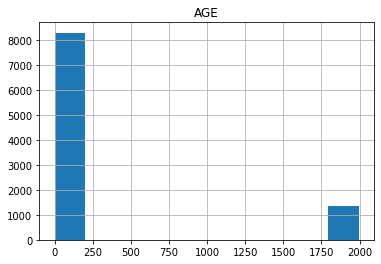

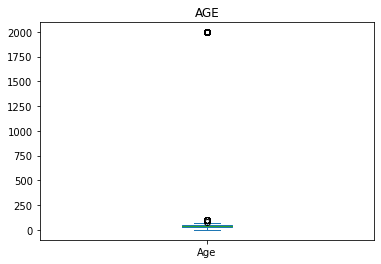

In [ ]:
h=df.iloc[:,0].hist()
h.set_title("AGE")
h.plot()
plt.show()


b = df.iloc[:,0].plot.box()
b.plot()
b.set_title("AGE")
plt.show()

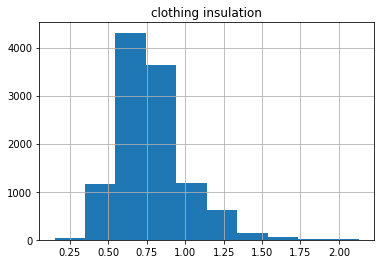

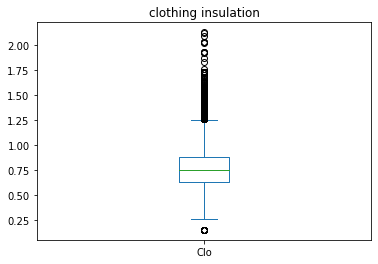

In [ ]:
h=df.iloc[:,1].hist()
h.set_title("clothing insulation")
h.plot()
plt.show()


b = df.iloc[:,1].plot.box()
b.plot()
b.set_title("clothing insulation")
plt.show()

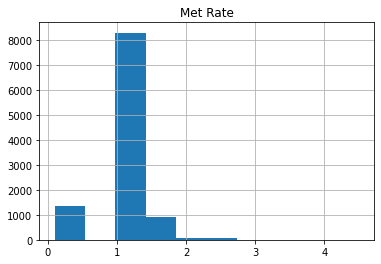

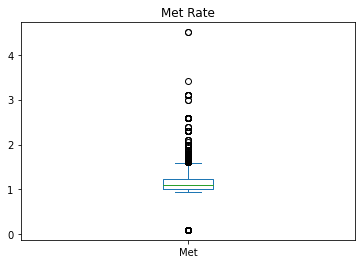

In [ ]:
h=df.iloc[:,2].hist()
h.set_title("Met Rate")
h.plot()
plt.show()


b = df.iloc[:,2].plot.box()
b.plot()
b.set_title("Met Rate")
plt.show()

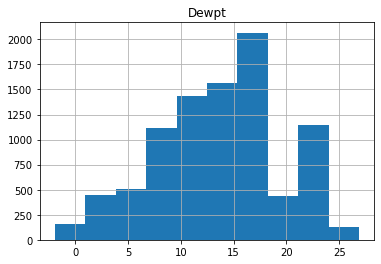

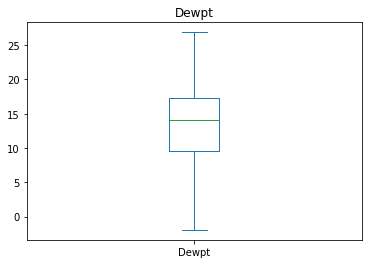

In [ ]:
h=df.iloc[:,3].hist()
h.set_title("Dewpt")
h.plot()
plt.show()


b = df.iloc[:,3].plot.box()
b.plot()
b.set_title("Dewpt")
plt.show()

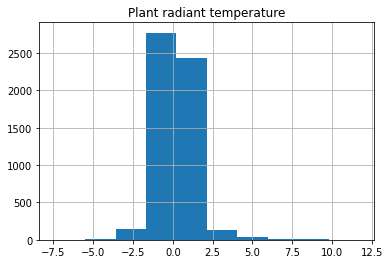

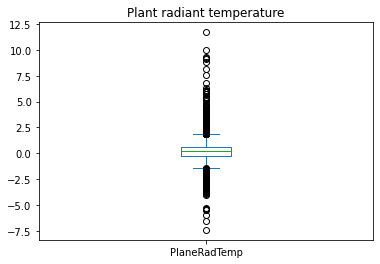

In [ ]:
h=df.iloc[:,4].hist()
h.set_title("Plant radiant temperature")
h.plot()
plt.show()


b = df.iloc[:,4].plot.box()
b.plot()
b.set_title("Plant radiant temperature")
plt.show()

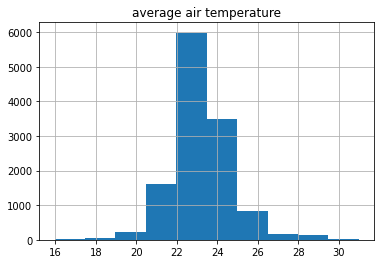

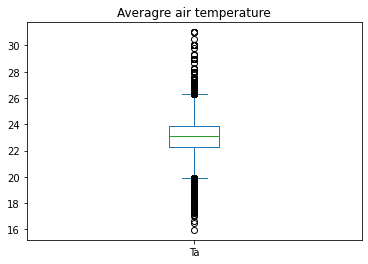

In [ ]:
h=df.iloc[:,5].hist()
h.set_title("average air temperature")
h.plot()
plt.show()


b = df.iloc[:,5].plot.box()
b.plot()
b.set_title("Averagre air temperature")
plt.show()

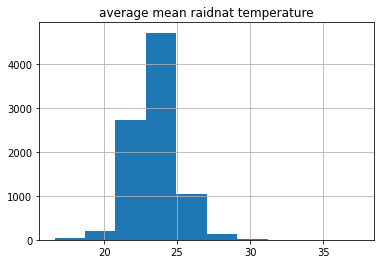

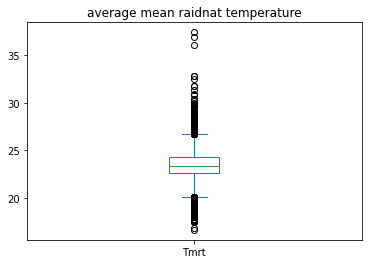

In [ ]:
h=df.iloc[:,6].hist()
h.set_title("average mean raidnat temperature")
h.plot()
plt.show()


b = df.iloc[:,6].plot.box()
b.plot()
b.set_title("average mean raidnat temperature")
plt.show()

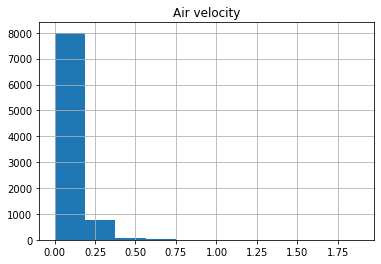

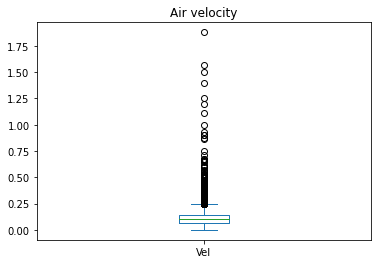

In [ ]:
h=df.iloc[:,7].hist()
h.set_title("Air velocity")
h.plot()
plt.show()


b = df.iloc[:,7].plot.box()
b.plot()
b.set_title("Air velocity")
plt.show()

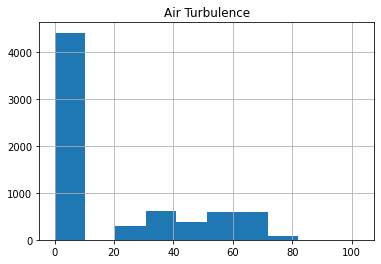

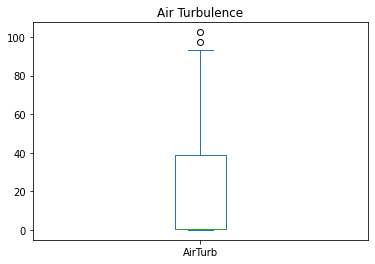

In [ ]:
h=df.iloc[:,8].hist()
h.set_title("Air Turbulence")
h.plot()
plt.show()


b = df.iloc[:,8].plot.box()
b.plot()
b.set_title("Air Turbulence")
plt.show()

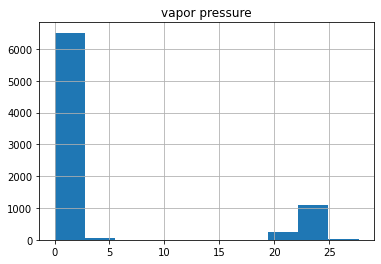

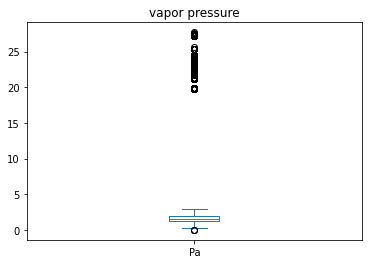

In [ ]:
h=df.iloc[:,9].hist()
h.set_title("vapor pressure")
h.plot()
plt.show()


b = df.iloc[:,9].plot.box()
b.plot()
b.set_title("vapor pressure")
plt.show()

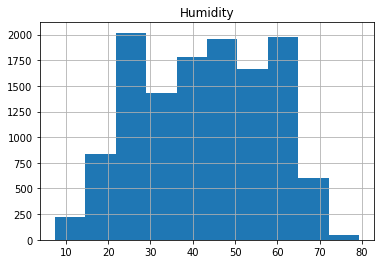

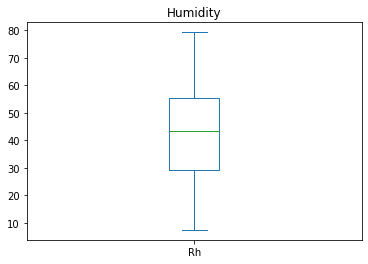

In [ ]:
h=df.iloc[:,10].hist()
h.set_title("Humidity")
h.plot()
plt.show()


b = df.iloc[:,10].plot.box()
b.plot()
b.set_title("Humidity")
plt.show()

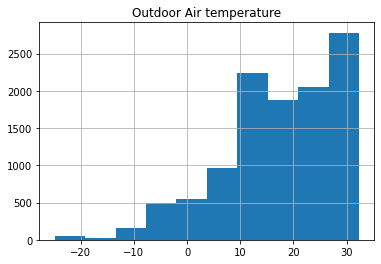

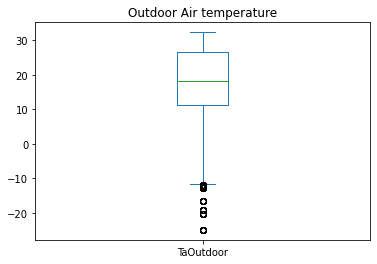

In [ ]:
h=df.iloc[:,11].hist()
h.set_title("Outdoor Air temperature")
h.plot()
plt.show()


b = df.iloc[:,11].plot.box()
b.plot()
b.set_title("Outdoor Air temperature")
plt.show()

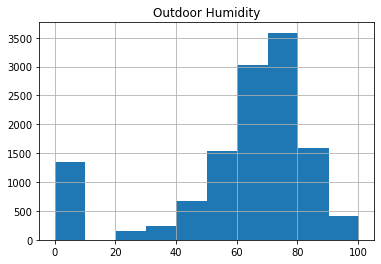

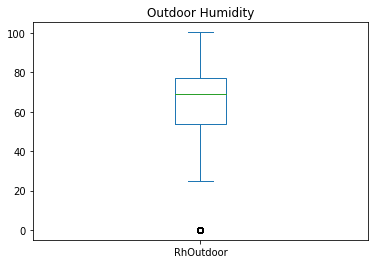

In [ ]:
h=df.iloc[:,12].hist()
h.set_title("Outdoor Humidity")
h.plot()
plt.show()


b = df.iloc[:,12].plot.box()
b.plot()
b.set_title("Outdoor Humidity")
plt.show()

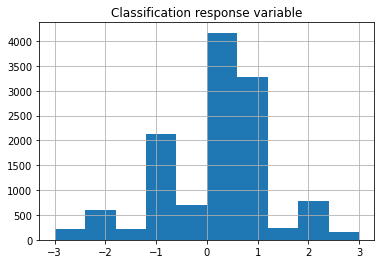

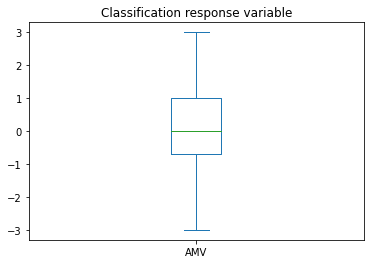

In [ ]:
h=df.iloc[:,13].hist()
h.set_title("Classification response variable")
h.plot()
plt.show()


b = df.iloc[:,13].plot.box()
b.plot()
b.set_title("Classification response variable")
plt.show()

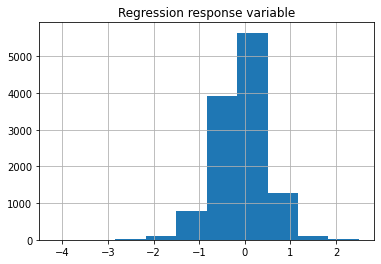

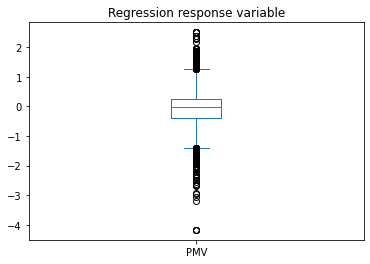

In [ ]:
h=df.iloc[:,14].hist()
h.set_title("Regression response variable")
h.plot()
plt.show()


b = df.iloc[:,14].plot.box()
b.plot()
b.set_title("Regression response variable")
plt.show()

#Fill Nulls and Remove Outliers

In [ ]:
df.iloc[:,13].fillna(df.iloc[:,13].mode(dropna=True)) #because qualitative data is filled with mode from slides
df=df.fillna(df.median(axis=0))
df.isnull().sum(axis = 0)

Age             0
Clo             0
Met             0
Dewpt           0
PlaneRadTemp    0
Ta              0
Tmrt            0
Vel             0
AirTurb         0
Pa              0
Rh              0
TaOutdoor       0
RhOutdoor       0
AMV             0
PMV             0
dtype: int64

In [ ]:
#replacing outliers with median

c1=df.iloc[:,0]
c1.sort_values()
Q1 = c1.quantile(0.25)
Q3 = c1.quantile(0.75)
IQR = Q3 - Q1
c1[(c1 > Q3 + 1.5 * IQR) | (c1 < Q1 - 1.5 * IQR)] = df.iloc[:,0].median()


c2=df.iloc[:,1]
c2.sort_values()
Q1 = c2.quantile(0.25)
Q3 = c2.quantile(0.75)
IQR = Q3 - Q1
c2[(c2 >Q3 + 1.5 * IQR ) | (c2 < Q1 - 1.5 * IQR)] = df.iloc[:,1].median()

c3=df.iloc[:,2]
c3.sort_values()
Q1 = c3.quantile(0.25)
Q3 = c3.quantile(0.75)
IQR = Q3 - Q1
c3[(c3 > Q3+ 1.5 * IQR) | (c3 < Q1 - 1.5 * IQR)] = df.iloc[:,2].median()

c4=df.iloc[:,3]
c4.sort_values()
Q1 = c4.quantile(0.25)
Q3 = c4.quantile(0.75)
IQR = Q3 - Q1
c4[(c4 > Q3+ 1.5 * IQR) | (c4 < Q1 - 1.5 * IQR)] = df.iloc[:,3].median()

c5=df.iloc[:,4]
c5.sort_values()
Q1 = c5.quantile(0.25)
Q3 = c5.quantile(0.75)
IQR = Q3 - Q1
c5[(c5 > Q3+ 1.5 * IQR) | (c5 < Q1 - 1.5 * IQR)] = df.iloc[:,3].median()

c6=df.iloc[:,5]
c6.sort_values()
Q1 = c6.quantile(0.25)
Q3 = c6.quantile(0.75)
IQR = Q3 - Q1
c6[(c6 > Q3+ 1.5 * IQR) | (c6 < Q1 - 1.5 * IQR)] = df.iloc[:,5].median()

c7=df.iloc[:,6]
c7.sort_values()
Q1 = c7.quantile(0.25)
Q3 = c7.quantile(0.75)
IQR = Q3 - Q1
c7[(c7 > Q3+ 1.5 * IQR) | (c7 < Q1 - 1.5 * IQR)] = df.iloc[:,6].median()

c8=df.iloc[:,7]
c8.sort_values()
Q1 = c8.quantile(0.25)
Q3 = c8.quantile(0.75)
IQR = Q3 - Q1
c8[(c8 > Q3+ 1.5 * IQR) | (c8 < Q1 - 1.5 * IQR)] = df.iloc[:,7].median()

c9=df.iloc[:,8]
c9.sort_values()
Q1 = c9.quantile(0.25)
Q3 = c9.quantile(0.75)
IQR = Q3 - Q1
c9[(c9 > Q3+ 1.5 * IQR) | (c9 < Q1 - 1.5 * IQR)] = df.iloc[:,8].median()

c10=df.iloc[:,9]
c10.sort_values()
Q1 = c10.quantile(0.25)
Q3 = c10.quantile(0.75)
IQR = Q3 - Q1
c10[(c10 > Q3+ 1.5 * IQR) | (c10 < Q1 - 1.5 * IQR)] = df.iloc[:,9].median()

c11=df.iloc[:,10]
c11.sort_values()
Q1 = c11.quantile(0.25)
Q3 = c11.quantile(0.75)
IQR = Q3 - Q1
c11[(c11 > Q3+ 1.5 * IQR) | (c11 < Q1 - 1.5 * IQR)] = df.iloc[:,10].median()

c12=df.iloc[:,11]
c12.sort_values()
Q1 = c12.quantile(0.25)
Q3 = c12.quantile(0.75)
IQR = Q3 - Q1
c12[(c12 > Q3+ 1.5 * IQR) | (c12 < Q1 - 1.5 * IQR)] = df.iloc[:,11].median()

c13=df.iloc[:,12]
c13.sort_values()
Q1 = c13.quantile(0.25)
Q3 = c13.quantile(0.75)
IQR = Q3 - Q1
c13[(c13 > Q3+ 1.5 * IQR) | (c13 < Q1 - 1.5 * IQR)] = df.iloc[:,12].median()

c14=df.iloc[:,13]
c14.sort_values()
Q1 = c14.quantile(0.25)
Q3 = c14.quantile(0.75)
IQR = Q3 - Q1
c14[(c14 > Q3+ 1.5 * IQR) | (c14 < Q1 - 1.5 * IQR)] = df.iloc[:,13].median()

c15=df.iloc[:,14]
c15.sort_values()
Q1 = c15.quantile(0.25)
Q3 = c15.quantile(0.75)
IQR = Q3 - Q1
c15[(c15 > Q3+ 1.5 * IQR) | (c15 < Q1 - 1.5 * IQR)] = df.iloc[:,14].median()

In [ ]:
dfnew = pd.DataFrame()
dfnew['Age']  = c1
dfnew['Clo'] = c2
dfnew['Met'] = c3
dfnew['Dewpt'] = c4
dfnew['PlaneRadTemp'] = c5
dfnew['Ta'] = c6
dfnew['Tmrt'] = c7
dfnew['Vel'] = c8
dfnew['AirTurb'] = c9
dfnew['Pa'] = c10
dfnew['Rh'] = c11
dfnew['TaOutdoor'] = c12
dfnew['RhOutdoor'] = c13
dfnew['AMV'] = c14
dfnew['PMV'] = c15

dfnew.describe()

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
count,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000,12565.000000
mean,34.672981,0.743771,1.137356,14.166521,6.198074,23.112356,23.346189,0.099215,0.461617,1.534463,42.530592,17.854835,68.496613,0.100143,-0.059369
std,8.129740,0.151706,0.114476,4.036115,6.884774,1.109124,0.667328,0.029183,0.107510,0.146991,15.040533,9.126296,12.660224,1.099617,0.445550
min,16.000000,0.350000,0.938567,3.740000,0.200000,19.923333,21.550000,0.023333,0.131667,1.072894,7.400000,-8.050000,24.975000,-3.000000,-1.280000
25%,31.000000,0.648800,1.100000,12.660000,0.200000,22.337992,23.150000,0.090000,0.466667,1.550667,29.400000,12.777778,63.038939,-0.700000,-0.350000
50%,35.000000,0.751700,1.100000,14.100000,0.200000,23.136667,23.359219,0.100000,0.500000,1.550667,43.276815,18.200000,68.795799,0.000000,-0.030000
75%,37.000000,0.810000,1.200000,15.910000,14.100000,23.770000,23.477336,0.108333,0.500000,1.550667,55.460000,25.555556,76.950000,1.000000,0.220000
max,66.000000,1.160000,1.500000,23.645750,14.100000,26.280000,25.190000,0.180000,0.988667,2.036000,79.300000,32.350000,100.350000,3.000000,1.150000


#Corr Matrix

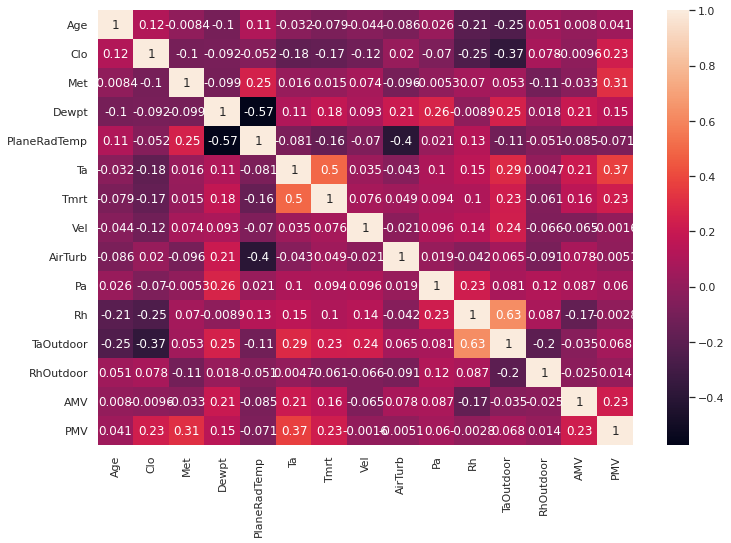

In [ ]:
#correlation matrixs


corr_matrix = dfnew.corr()
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(corr_matrix,annot=True)  #annot includes values
plt.show()

#Entropy

In [ ]:
def entropy(df):
    ent = 0
    for i in range(0,df.shape[0]): #row value 0 to 12564
        for j in range(0,df.shape[1]): #col value 0 to 14
            if df.iloc[i,j] != 0:
                ent = ent - df.iloc[i,j]*math.log(df.iloc[i,j],2) #base 2
    return ent

In [ ]:
# calculate entropy for each column followed by information gain
ent = []
for i in range(0,dfnew.shape[1]):
    ent.append(entropy(dfnew.iloc[:,i].value_counts(normalize=True).to_frame()))
print(ent)

[3.818910289280119, 6.900567693545072, 4.114080637960585, 7.15194458454698, 0.9864247652866578, 8.031956480094909, 6.61685125908637, 4.2428330472931695, 3.457110647798986, 4.843763929949972, 10.867942101564656, 7.448090722224292, 7.176409822887552, 3.4736989903876423, 7.27225555232147]


In [ ]:
def entropyy(df):
    p = df.value_counts(normalize = True) # for all unqiue rows in dataframe
    entropy = -1 * np.sum(np.log2(p) * p) # enntropy formula
    return round(entropy, 5)

In [ ]:
def infogain(df, t, f):
    te = entropyy(df[t])
    entropy_list = []
    weight_list = []
    for i in df[f].unique():
        fl = df[df[f] == i]
        entropy_level = entropyy(fl[t])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(fl) / len(df)
        weight_list.append(round(weight_level, 3))
    re = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = te - re
    return information_gain

for i in dfnew.drop(columns='AMV').columns:
    info_gain = infogain(dfnew, 'AMV', i)
    print(i)
    print(round(info_gain, 5))

Age
0.26538
Clo
0.74023
Met
0.47112
Dewpt
1.57829
PlaneRadTemp
0.04051
Ta
1.21991
Tmrt
1.2454
Vel
0.5113
AirTurb
0.66202
Pa
1.28522
Rh
2.3646
TaOutdoor
0.86463
RhOutdoor
0.8259
PMV
0.58491


#Part B

In [ ]:
from sklearn import metrics
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [ ]:
# split the data randomly into 80/20 for linear regression
X, X_test, y, y_test = train_test_split(dfnew.iloc[:,0:12], dfnew.iloc[:,14], test_size=0.2, random_state=0)

In [ ]:
# apply forward selection considering PMV as response variable and other variables as predictors
X = dfnew.drop('PMV',axis=1)
X = X.drop('AMV',axis=1)
y = dfnew['PMV']

X.shape, y.shape

((12565, 13), (12565,))

Linear Regression Forward

In [ ]:
lreg = LinearRegression()

for i in range(1,13):
  sfs1 = sfs(lreg, k_features=i, forward=True,verbose=0, scoring='neg_mean_squared_error') #mean squared error just neagtive
  sfs1.fit(X, y)
  print(sfs1.k_feature_names_) #print col names
  #print(sfs1.k_feature_idx_) #print indexes
  print(sfs1.k_score_) # neg mean squared error

('Ta',)
-0.17514734547353156
('Met', 'Ta')
-0.15654999880754303
('Clo', 'Met', 'Ta')
-0.13453129884405954
('Clo', 'Met', 'Dewpt', 'Ta')
-0.1280576938581658
('Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt')
-0.12787848111283703
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt')
-0.1276760563534708
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'RhOutdoor')
-0.12766104986895543
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'TaOutdoor', 'RhOutdoor')
-0.12774510224453203
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'TaOutdoor', 'RhOutdoor')
-0.1279571962079183
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'TaOutdoor', 'RhOutdoor')
-0.12836299867184053
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'TaOutdoor', 'RhOutdoor')
-0.129007530695557
('Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'TaOutdoor', 'RhOutdoor')
-0.1306639908679552


Linear Regression Backwards

In [ ]:
lreg = LinearRegression()

for i in reversed(range(1,13)): # selects 13 then removes one aka backward
  sfs1 = sfs(lreg, k_features=i, forward=False,verbose=0, scoring='neg_mean_squared_error') #mean squared error just enagtive
  sfs1.fit(X, y)
  print(sfs1.k_feature_names_) #print col names
  #print(sfs1.k_feature_idx_) #print indexes
  print(sfs1.k_score_) # neg mean squared error

('Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'TaOutdoor', 'RhOutdoor')
-0.1306639908679552
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'TaOutdoor', 'RhOutdoor')
-0.129007530695557
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'TaOutdoor', 'RhOutdoor')
-0.12836299867184053
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'TaOutdoor', 'RhOutdoor')
-0.1279571962079183
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'TaOutdoor', 'RhOutdoor')
-0.12774510224453203
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt', 'RhOutdoor')
-0.12766104986895543
('Age', 'Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt')
-0.1276760563534708
('Clo', 'Met', 'Dewpt', 'Ta', 'Tmrt')
-0.12787848111283703
('Clo', 'Met', 'Dewpt', 'Ta')
-0.1280576938581658
('Clo', 'Met', 'Ta')
-0.13453129884405954
('Met', 'Ta')
-0.15654999880754303
('Ta',)
-0.17514734547353156


Logistic Forward selection

In [ ]:
# split the data randomly into 80/20 for logistic regression
X, X_test, y, y_test = train_test_split(dfnew.iloc[:,0:12], dfnew.iloc[:,13], test_size=0.2, random_state=0)

y = y.astype(int)

X.shape, y.shape

((10052, 12), (10052,))

In [ ]:
X = dfnew.drop('PMV',axis=1)
X = X.drop('AMV',axis=1)
y = dfnew['AMV']

#scaling cause logreg masla krta
sc =  preprocessing.StandardScaler()
y = y.astype(int)
X= sc.fit_transform(X)
X.shape, y.shape

((12565, 13), (12565,))

In [ ]:
logr=LogisticRegression(random_state=16)

for i in (range(1,13)):
  sfs1 = sfs(logr, k_features=i, forward=True, verbose=0, scoring='accuracy')
  sfs1.fit(X, y)
  print(sfs1.k_feature_names_) #print col names
  #print(sfs1.k_feature_idx_) #print indexes
  print(sfs1.k_score_) # accuarcy

('3',)
0.4867489056904099
('3', '7')
0.4855551134102666
('3', '6', '7')
0.48356545961002784
('0', '3', '6', '7')
0.48181456426581776
('0', '2', '3', '6', '7')
0.4763231197771588
('0', '1', '2', '3', '6', '7')
0.4700358137684043
('0', '1', '2', '3', '6', '7', '12')
0.4632709908475926
('0', '1', '2', '3', '6', '7', '9', '12')
0.45292479108635086
('0', '1', '2', '3', '6', '7', '8', '9', '12')
0.4366892160764027
('0', '1', '2', '3', '6', '7', '8', '9', '10', '12')
0.41480302427377636
('0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '12')
0.4308794269797055
('0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12')
0.422841225626741


logistic backward selection



In [ ]:
logr=LogisticRegression(random_state=16)

for i in reversed(range(1,13)):
  sfs1 = sfs(logr, k_features=i, forward=False, verbose=0, scoring='accuracy')
  sfs1.fit(X, y)
  print(sfs1.k_feature_names_) #print col names
  #print(sfs1.k_feature_idx_) #print indexes
  print(sfs1.k_score_) # accuarcy

('0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12')
0.422841225626741
('0', '1', '2', '5', '6', '7', '8', '9', '10', '11', '12')
0.4417031436530044
('0', '1', '2', '5', '6', '7', '9', '10', '11', '12')
0.45658575407879026
('0', '1', '2', '5', '6', '7', '10', '11', '12')
0.46223637087146835
('0', '1', '5', '6', '7', '10', '11', '12')
0.4667727815360127
('0', '1', '5', '7', '10', '11', '12')
0.4701949860724234
('0', '1', '5', '10', '11', '12')
0.47282132908873853
('1', '5', '10', '11', '12')
0.4749701551929964
('1', '5', '10', '11')
0.4777556705133307
('5', '10', '11')
0.4756864305610824
('10', '11')
0.47306008754476725
('11',)
0.40214882610425784


#Confusion matrix

In [ ]:
X=dfnew.iloc[:,3].to_numpy().reshape(-1,1) #dept best accuaracy
y=dfnew.iloc[:,13].to_numpy().astype(int) #AMV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 30.5, 'predicted')

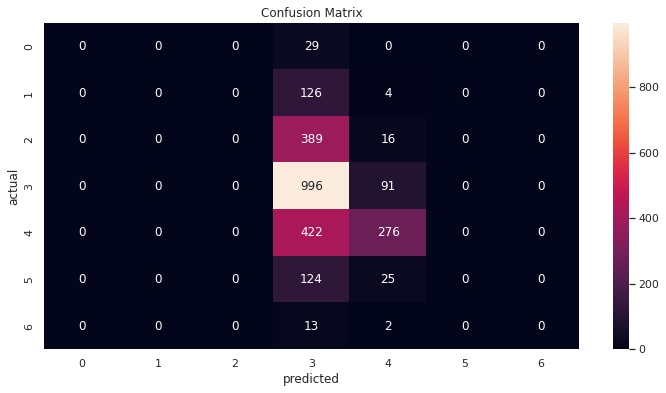

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel("actual")
plt.xlabel("predicted")

In [ ]:
test_acc = accuracy_score(y_test, y_pred)
print((test_acc*100))

50.61679267807402


# 3 Fold Cross Validation


In [ ]:
#to apply cross validation on logregression
Xlogr=dfnew.iloc[:,3].to_numpy().reshape(-1,1) #dept best accuaracy
ylogr=dfnew.iloc[:,13].to_numpy().astype(int) #AMV

#ro apply crossvalidation on linearregression

Xlin=dfnew.iloc[:,[0,1,2,3,5,6,12]].to_numpy() #on only optimal parameters
ylin=dfnew.iloc[:,14].to_numpy() #PMV



In [ ]:


cv = KFold(n_splits=3, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model,Xlin,ylin, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(mean(absolute(scores)))

cv = KFold(n_splits=3, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model,Xlogr,ylogr, scoring='accuracy', cv=cv, n_jobs=-1)
print(mean(absolute(scores)))


#These scores are near to what our forward/backward selectors predicted so data set is good

0.1230342183874411
0.49311594343335957
